In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("D:\Rohan\ML\Datasets\Air Passengers\AirPassengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df['Month'] = pd.to_datetime(df['Month'])


df['quarter'] = df['Month'].dt.quarter
df['month'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year
df['dayofmonth'] = df['Month'].dt.day 

df.head()

,Month,Passengers,quarter,month,year,dayofmonth
0,1949-01-01,112,1,1,1949,1
1,1949-02-01,118,1,2,1949,1
2,1949-03-01,132,1,3,1949,1
3,1949-04-01,129,2,4,1949,1
4,1949-05-01,121,2,5,1949,1


In [8]:
df.shape

(144, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
 2   quarter     144 non-null    int32         
 3   month       144 non-null    int32         
 4   year        144 non-null    int32         
 5   dayofmonth  144 non-null    int32         
dtypes: datetime64[ns](1), int32(4), int64(1)
memory usage: 4.6 KB


In [17]:
from sklearn.model_selection import train_test_split


test_size = 0.2

split_index = int(len(df) * (1 - test_size))

train_df = df[:split_index]
test_df = df[split_index:]

features = ['quarter', 'month', 'year', 'dayofmonth']
target = 'Passengers'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [31]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV


param_grid = {
    'n_estimators': [300, 500, 1000, 2000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best parameters found: ", best_params)
print("Best estimator found: ", best_model)


best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=True)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.9}
Best estimator found:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
[0]	validation_0-rmse:90.09853	validation_1-r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

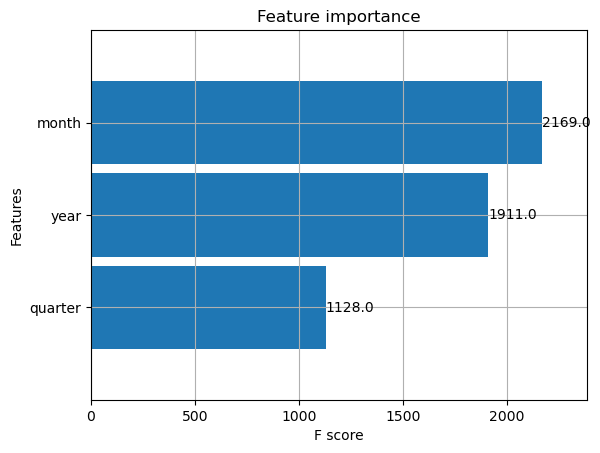

In [32]:
_ = plot_importance(best_model, height=0.9)

In [34]:
test_df['predictions']=best_model.predict(X_test)
all_df=pd.concat([test_df, train_df], sort=False)

all_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4484\333387595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predictions']=best_model.predict(X_test)


,Month,Passengers,quarter,month,year,dayofmonth,date,predictions
115,1958-08-01,505,3,8,1958,1,1958-08-01,485.608521
116,1958-09-01,404,3,9,1958,1,1958-09-01,428.423950
117,1958-10-01,359,4,10,1958,1,1958-10-01,369.332489
118,1958-11-01,310,4,11,1958,1,1958-11-01,331.737091
119,1958-12-01,337,4,12,1958,1,1958-12-01,360.254395


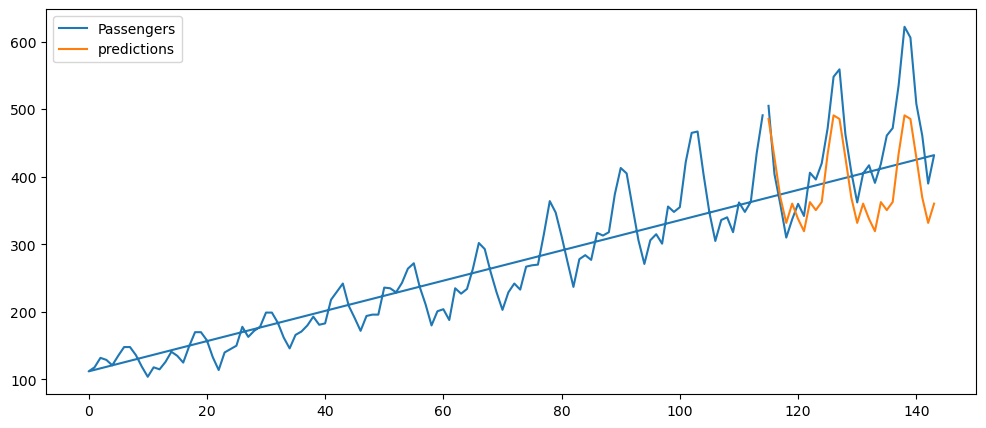

In [36]:
_ = all_df[['Passengers','predictions']].plot(figsize=(12, 5))